# Домашнее задание №2

В данном задании вам предлагаются 3 задачи:

#### 1. Обучение небольшой ArcFace модели (0.4 балла)
Вам предлагается использовать функцию потерь [ArcFace](https://arxiv.org/abs/1801.07698) для решения задачи Metric Learning в распознавании лиц.  
Подробное описание задачи вы можете найти в соответствующем разделе домашнего задания.  
**Ваша цель:** Обучить модели для предсказания дискриминативных представлений изображений, $\textbf{z}\in\mathbb{R}^{2}$, с помощью функции потерь SoftMax и функции из статьи [ArcFace](https://arxiv.org/abs/1801.07698) (см. описание задачи 1). Модели необходимо обучить на 4-х самых многочисленных классах из набора изображений лиц [MS1M-ArcFace](https://github.com/deepinsight/insightface/tree/master/recognition/_datasets_).  Затем нужно изобразить полученные представления на двух рисунках (один для SoftMax другой для ArcFace функций потерь). 

Рисунок для SoftMax функции будет вам дан. Вспомогательный код для загрузки данных и для обучения модели с помощью SoftMax функции потерь вы можете найти в разделе с заданием.  
Помогает ли функция потерь ArcFace для улучшения дикриминативных способностей векторов представлений?

#### 2. Использование предобученной модели для решения задачи верификации лиц (0.4 балла)


## Задача 1. Обучение небольшой ArcFace модели (0.4 балла)

При решении задачи распознавания лиц возникает необходимость ответить на вопрос: изображен ли на двух разных картинках один и тот же человек или нет?  
На этот вопрос можно ответить с помощью функции расстояния между изображениями, учитывающую абстрактную семантическую информацию.  


Современные методы распознавания лиц используют большие наборы данных, содержащие изображения разных людей, для обучения нейросетей, вычисляющий осмысленные вектора представлений изображений лиц.
Для каждого изображения лица человека $\textbf{x}$ с помощью обучаемой функции $f_{\theta}(*)$ вычисляется вектор представления $\textbf{x}$:
$$
\textbf{z} = f_{\theta}(\textbf{x})
$$
Параметры $\theta$ подбираются так, чтобы расстояние между векторами представлений разных людей было велико, а между представлениями изображений одного и того же человека было низко:
$$
d(\textbf{z}_i,\textbf{z}_j)>>d(\textbf{z}_i,\textbf{z}'_i)
$$
где $\mathbf{id}(\textbf{x}_i)=\mathbf{id}(\textbf{x}'_i),\,\mathbf{id}(\textbf{x}_i)\neq\mathbf{id}(\textbf{x}_j)$, $d$ - простая функция расстояния, e.g косинусное расстояние:
$$
d(\textbf{z}_i,\textbf{z}_j) = -\frac{\langle\textbf{z}_i,\textbf{z}_j\rangle}{\left\lVert\textbf{z}_i\right\rVert\left\lVert\textbf{z}_j\right\rVert}
$$

Таким образом мы можем получить осмысленную функцию расстояния между изображениями лиц.  

Для получения искомых представлений можно решать задачу классификации на большом наборе данных с изображениями разных людей.  
Затем можно использовать вектор перед линейным слоем как вектор представления лица. 
Здесь каждый человек в наборе данных рассматривается как отдельный класс, а множество изображений его лица рассматриваются как представители класса.  
Softmax функция потерь для много-классовой классификации:

$$
    L = -\frac{1}{N}\sum_{i=1}^N\log\frac{e^{W_{y_i}^T\textbf{z}_i + b_{y_i}}}{\sum_{j=1}^ne^{W_{j}^T\textbf{z}_i + b_{j}}}
$$
$\textbf{z}_i$ - представление изображения, $N$ - число изображений в мини батче, $W_j, b_j$ - веса гиперплоскости для каждого класса.

Если мы ограничим $x$, чтобы он имел ограниченную норму s, и $W_j$ имел норму 1, а $b_j=0$, тогда функция потерь может быть переписана в следующей форме:
$$
L = -\frac{1}{N}\sum_{i=1}^N
\log
\frac{e^{s\cos\theta_{y_i}}}
{e^{s\cos\theta_{y_i}} + \sum_{j\neq y_i}^ne^{s\cos\theta_{j}}}
$$
где $\theta_j$ - угол между представлением $i$-го изображения и вектором $W_j$ указывающим на центр $j$-ой класса.

Мы можем видеть, что здесь максимизируется косинус угла между представлением и соответствующим вектором класса.

В идеале мы хотим минимизировать сам угол, а не максимизировать его косинус, потому что угол лучше соответствует близости в пространстве представлений.

Предлагается [ArcFace](https://arxiv.org/abs/1801.07698) функция потерь для непосредственной минимизации угла:
$$
L = -\frac{1}{N}\sum_{i=1}^N
\log
\frac{e^{s\cos(\theta_{y_i}+m)}}
{e^{s\cos(\theta_{y_i}+m)} + \sum_{j\neq y_i}^ne^{s\cos\theta_{j}}}
$$
где $m=0.5$.

**Ваша цель:** Обучить модели для предсказания дискриминативных представлений изображений, $\textbf{z}\in\mathbb{R}^{2}$, с помощью функции потерь SoftMax и функции из статьи [ArcFace](https://arxiv.org/abs/1801.07698) (см. описание задачи 1). Модели необходимо обучить на 8-ми самых многочисленных классах из набора изображений лиц [MS1M-ArcFace](https://github.com/deepinsight/insightface/tree/master/recognition/_datasets_).  Затем нужно изобразить полученные представления на двух рисунках (один для SoftMax другой для ArcFace функций потерь). 

Рисунок для SoftMax функции будет вам дан. Вспомогательный код для загрузки данных и для обучения модели с помощью SoftMax функции потерь вы можете найти в разделе с заданием.  
Помогает ли функция потерь ArcFace для улучшения дикриминативных способностей векторов представлений?

#### Загрузка данных

Загрузите набор MS1M-ArcFace и распакуйте данные текущей дериктории:
https://drive.google.com/file/d/1SXS4-Am3bsKSK615qbYdbA_FMVh3sAvR/view

In [1]:
import torch
import pytorch_lightning as pl
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import mxnet as mx
import numbers
import torch.nn.functional as F
from tqdm import tqdm
import numpy as np
import os
from pathlib import Path

In [2]:
class MXFaceDataset(Dataset):
    def __init__(self, root_dir, num_labels, test=False):
        """
        ArcFace loader
        https://github.com/deepinsight/insightface/blob/master/recognition/arcface_torch/dataset.py
        """
        super(MXFaceDataset, self).__init__()

        self.test = test
        if self.test:
            self.transform = transforms.Compose(
                [
                    transforms.ToPILImage(),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
                ]
            )
        else:
            self.transform = transforms.Compose(
                [
                    transforms.ToPILImage(),
                    transforms.RandomHorizontalFlip(),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
                ]
            )
        self.root_dir = root_dir
        path_imgrec = os.path.join(root_dir, "train.rec")
        path_imgidx = os.path.join(root_dir, "train.idx")
        self.imgrec = mx.recordio.MXIndexedRecordIO(path_imgidx, path_imgrec, "r")
        s = self.imgrec.read_idx(0)
        header, _ = mx.recordio.unpack(s)
        if header.flag > 0:
            self.header0 = (int(header.label[0]), int(header.label[1]))
            self.imgidx = np.array(range(1, int(header.label[0])))
        else:
            self.imgidx = np.array(list(self.imgrec.keys))
        labels_path = Path(root_dir) / "labels.npy"
        if labels_path.is_file():
            self.labels = np.load(labels_path)
        else:
            print('Listing labels...')
            labels = []
            for i in tqdm(range(len(self.imgidx))):
                idx = self.imgidx[i]
                s = self.imgrec.read_idx(idx)
                header, img = mx.recordio.unpack(s)
                label = header.label
                labels.append(int(label))
            self.labels = np.array(labels)
            np.save(labels_path, self.labels)
        unique_labels, unique_counts = np.unique(self.labels, return_counts=True)
        top_ids = np.argsort(unique_counts)[::-1][:num_labels]
        self.top_labels = unique_labels[top_ids]

        self.label_map = dict(
            zip(self.top_labels.tolist(), np.arange(len(self.top_labels)))
        )

    def __getitem__(self, index):
        idx = self.imgidx[index]
        s = self.imgrec.read_idx(idx)
        header, img = mx.recordio.unpack(s)
        label = header.label
        if not isinstance(label, numbers.Number):
            label = label[0]
        label = self.label_map[int(label)]
        label = torch.tensor(label, dtype=torch.long)
        sample = mx.image.imdecode(img).asnumpy()
        if self.transform is not None:
            sample = self.transform(sample)
        if self.test:
            return sample
        else:
            return sample, label

    def __len__(self):
        return len(self.imgidx)

In [3]:
num_people = 4
ms1m_dataset = MXFaceDataset("data/ms1m/", num_labels=num_people)
people_ids = np.where(np.isin(ms1m_dataset.labels, ms1m_dataset.top_labels))[0]
people_set = torch.utils.data.Subset(ms1m_dataset, people_ids)

In [4]:
len(people_set)

2342

In [5]:
from iresnet import iresnet50_normalized


class MetricLearningModel(pl.LightningModule):
    def __init__(
        self, backbone: torch.nn.Module, loss: torch.nn.Module, num_labels: int
    ):
        super().__init__()
        self.backbone = backbone
        self.loss = loss
        self.softmax_weights = torch.nn.Parameter(
            torch.normal(0, 10, size=(2, num_labels)), requires_grad=True
        )

    def forward(self, x):
        backbone_outputs = self.backbone(x)
        features = backbone_outputs["feature"]
        norm_softmax_weights = F.normalize(self.softmax_weights, dim=0)
        logits = torch.matmul(features, norm_softmax_weights)
        return features, logits

    def training_step(self, batch):
        images, labels = batch
        features, logits = self(images)
        loss = self.loss(logits, labels)
        self.log("train_loss", loss.item(), prog_bar=True)
        return loss

    def configure_optimizers(self):
        params = list(self.backbone.parameters()) + [self.softmax_weights]
        optimizer = torch.optim.AdamW(params, lr=1e-4, weight_decay=5e-5)
        return {
            "optimizer": optimizer,
        }


backbone_model = iresnet50_normalized(num_features=2)
softmax_loss = torch.nn.CrossEntropyLoss()
arcface_model = MetricLearningModel(backbone_model, softmax_loss, num_labels=num_people)

In [6]:
batch_size = 128
num_workers = 10
max_epochs=10

In [7]:
from pytorch_lightning import Trainer
import pytorch_lightning as pl

trainer = Trainer(max_epochs=max_epochs, default_root_dir="outputs/softmax_train")
train_dataloader = DataLoader(
    people_set,
    batch_size,
    shuffle=True,
    drop_last=True,
    num_workers=num_workers,
)
trainer.fit(arcface_model, train_dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Initializing distributed: GLOBAL_RANK: 0, MEMBER: 1/2
Initializing distributed: GLOBAL_RANK: 1, MEMBER: 2/2
----------------------------------------------------------------------------------------------------
distributed_backend=nccl
All distributed processes registered. Starting with 2 processes
----------------------------------------------------------------------------------------------------

You are using a CUDA device ('NVIDIA A10') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
LOCAL_RANK: 1 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type             | Params
----------------------------------------------
0 | backbone | IResNetNorm      | 30.8 M
1 | loss     | CrossEntropyLoss

Epoch 9: 100%|██████████| 9/9 [00:19<00:00,  2.20s/it, v_num=12, train_loss=0.792]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 9/9 [00:20<00:00,  2.33s/it, v_num=12, train_loss=0.792]


### Вычисление представлений

In [10]:
backbone_model = iresnet50_normalized(num_features=2)
softmax_loss = torch.nn.CrossEntropyLoss()
checkpoint_path = "/app/spring_2023/homeworks/homework_2/outputs/softmax_train/lightning_logs/version_12/checkpoints/epoch=9-step=90.ckpt"
softmax_model = MetricLearningModel.load_from_checkpoint(
    num_labels=num_people,
    backbone=backbone_model,
    loss=softmax_loss,
    checkpoint_path=checkpoint_path,
)

In [11]:
def predict_features(model):
    test_dataloader = DataLoader(
        people_set,
        16,
        shuffle=False,
        drop_last=False,
        num_workers=num_workers,
    )
    cuda = torch.device("cuda")
    model.to(cuda)
    # disable randomness, dropout, etc...
    model.eval()
    predicted_features = []
    image_labels = []
    for batch in tqdm(test_dataloader):
        images, labels = batch
        images = images.to(cuda)
        features, _ = model(images)
        features = features.detach().cpu().numpy()
        labels = labels.numpy()
        predicted_features.append(features)
        image_labels.append(labels)
    predicted_features = np.concatenate(predicted_features)
    image_labels = np.concatenate(image_labels)
    return predicted_features, image_labels

In [12]:
predicted_features, image_labels = predict_features(softmax_model)

100%|██████████| 147/147 [00:16<00:00,  9.18it/s]


In [13]:
import matplotlib.colors as mcolors

colors = list(mcolors.TABLEAU_COLORS)[:num_people]
softmax_weights = softmax_model.softmax_weights.detach().cpu()
softmax_weights = F.normalize(softmax_weights, dim=0).numpy()

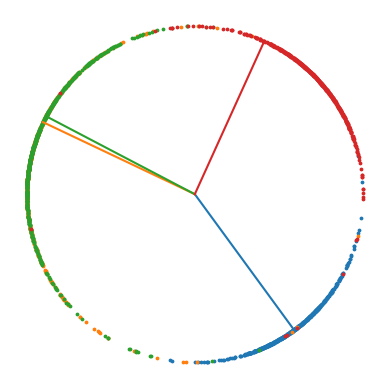

In [14]:
import matplotlib.pyplot as plt

max_classes = 4
for i, (weight, color) in enumerate(zip(softmax_weights.T, colors)):
    points = predicted_features[image_labels == i]
    x, y = [0, weight[0]], [0, weight[1]]
    plt.plot(x, y, marker="", c=color)
    plt.scatter(points[:, 0], points[:, 1], color=color, s=3)
    if i == (max_classes - 1):
        break
plt.gca().set_aspect("equal")
plt.axis("off")
plt.show()

In [ ]:
a_np = np.array([[1, 2, 3], [4, 5, 6]])
a = torch.nn.Parameter(
            torch.tensor(a_np, dtype=float), requires_grad=True)

In [ ]:
b = F.normalize(a, dim=0)

In [ ]:
b

tensor([[0.2425, 0.3714, 0.4472],
        [0.9701, 0.9285, 0.8944]], dtype=torch.float64, grad_fn=<DivBackward0>)

In [ ]:
features_np = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
features = torch.tensor(features_np, dtype=float)

In [ ]:
features

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]], dtype=torch.float64)

In [ ]:
a

Parameter containing:
tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float64, requires_grad=True)

In [ ]:
torch.matmul(features, a)

tensor([[ 9., 12., 15.],
        [19., 26., 33.],
        [29., 40., 51.],
        [39., 54., 69.]], dtype=torch.float64, grad_fn=<MmBackward0>)

In [ ]:
features

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]], dtype=torch.float64)

In [ ]:
b_np = a_np / np.linalg.norm(a_np, axis=0, keepdims=True)

In [ ]:
b_np.T[0]

array([0.24253563, 0.9701425 ])

In [ ]:
a

Parameter containing:
tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float64, requires_grad=True)